<a href="https://colab.research.google.com/github/DineshReddy0530/Grepthor/blob/master/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import confusion_matrix,roc_curve


In [2]:
from zipfile import ZipFile
file_name='creditcardfraud.zip'

with ZipFile(file_name,'r') as kip:
  kip.extractall()
  print("Done")

Done


In [0]:
data=pd.read_csv('creditcard.csv')

In [3]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


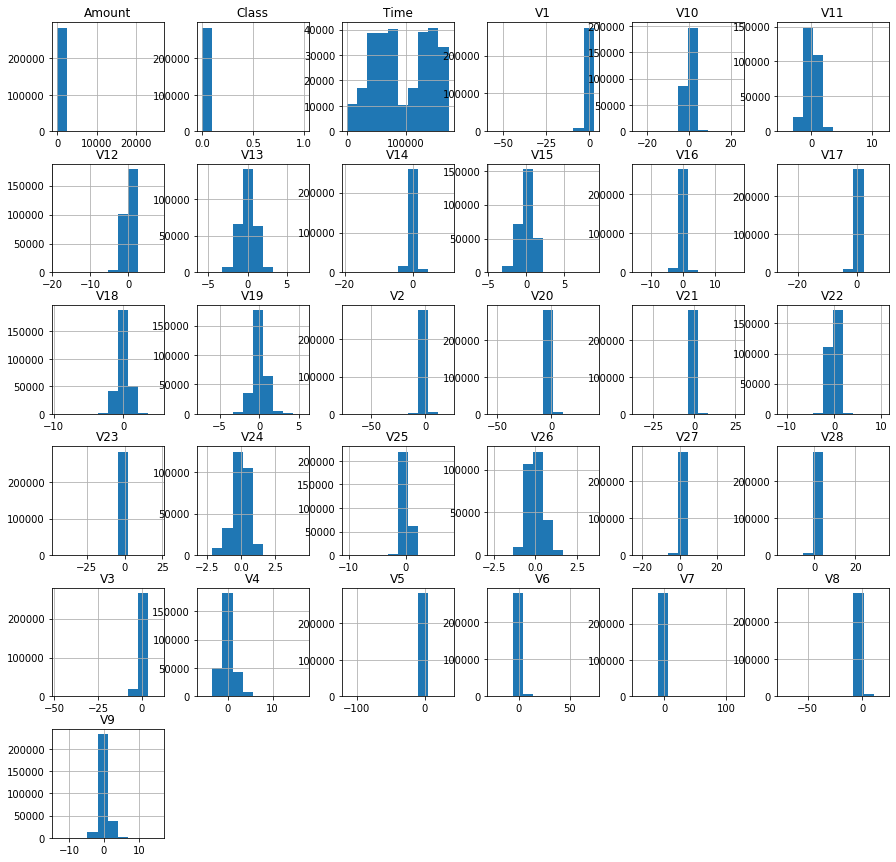

In [6]:
data.hist(figsize=(15,15))
plt.show()

In [0]:
#Fraud=Data[Data['Class']==1]
#Valid=Data[Data['Class']==0]

In [0]:
FraudT=data[data['Class']==1]
ValidT=data[data['Class']==0]

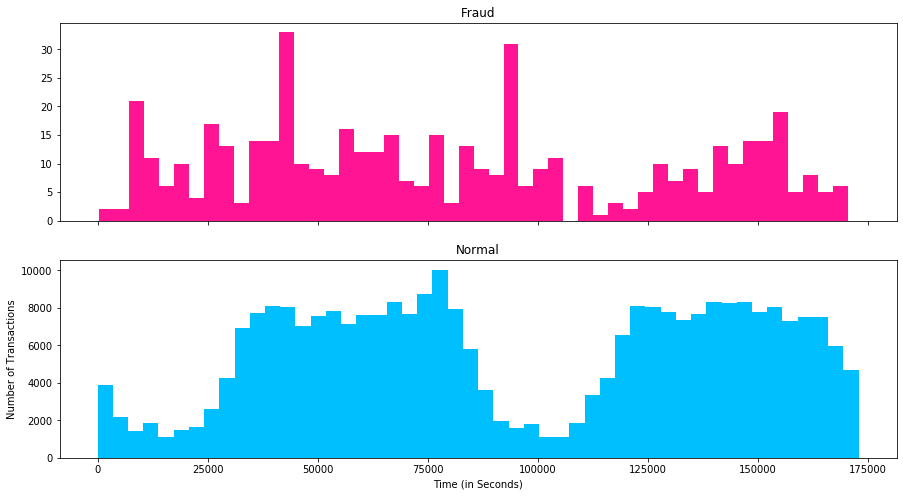

In [9]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1.hist(FraudT['Time'], bins = 50, color = 'deeppink')
ax1.set_title('Fraud')

ax2.hist(ValidT['Time'], bins = 50, color = 'deepskyblue')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

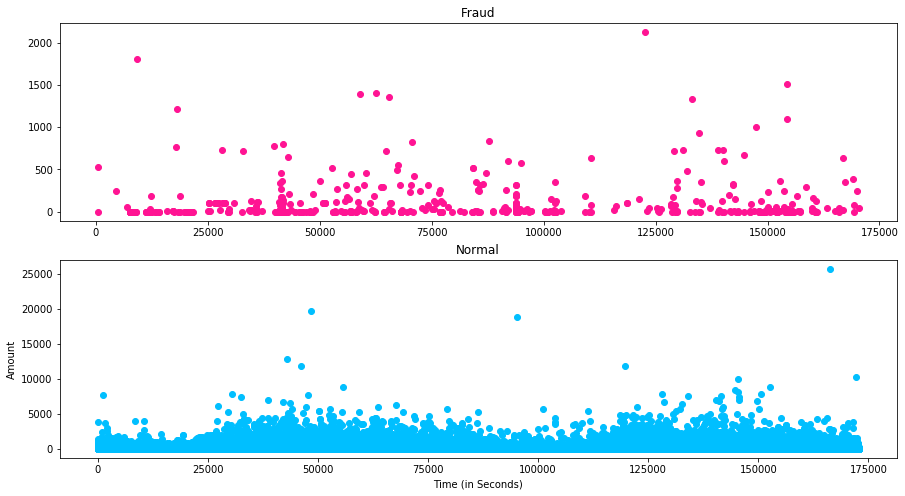

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.scatter(FraudT['Time'], FraudT.Amount, color = 'deeppink')
plt.title('Fraud')

plt.subplot(212)
plt.scatter(ValidT['Time'], ValidT['Amount'],  color = 'deepskyblue')
plt.title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [11]:
outlier_fraction=len(FraudT)/float(len(ValidT))
print("Outlier_fraction: {}".format(outlier_fraction))
print(f"Fraud cases: {len(FraudT)}")
print("Valid cases:",len(ValidT))

Outlier_fraction: 0.0017304750013189597
Fraud cases: 492
Valid cases: 284315


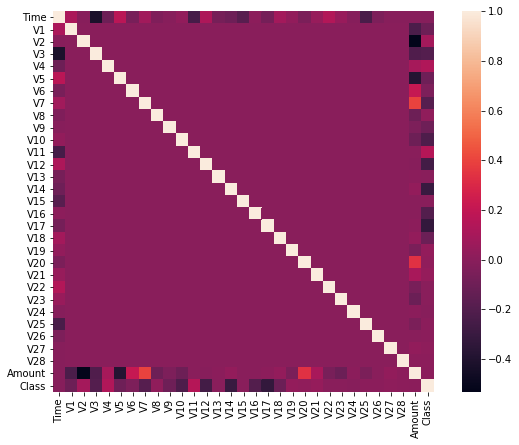

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=False,square=True)

In [0]:
X=data.iloc[:,:30]
Y=data.iloc[:,-1]

In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [18]:
plt.figure(figsize=(9, 7))
n_outliers = len(FraudT)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

KeyboardInterrupt: ignored

<Figure size 648x504 with 0 Axes>

In [15]:
list(enumerate(classifiers.items()))

[(0,
  ('Isolation Forest', IsolationForest(behaviour='deprecated', bootstrap=False,
                   contamination=0.0017304750013189597, max_features=1.0,
                   max_samples=284807, n_estimators=100, n_jobs=None,
                   random_state=1, verbose=0, warm_start=False))),
 (1,
  ('Local Outlier Factor',
   LocalOutlierFactor(algorithm='auto', contamination=0.0017304750013189597,
                      leaf_size=30, metric='minkowski', metric_params=None,
                      n_jobs=None, n_neighbors=20, novelty=False, p=2)))]

In [16]:
print(classification_report(Y, y_pred))

NameError: ignored

In [0]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification

def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

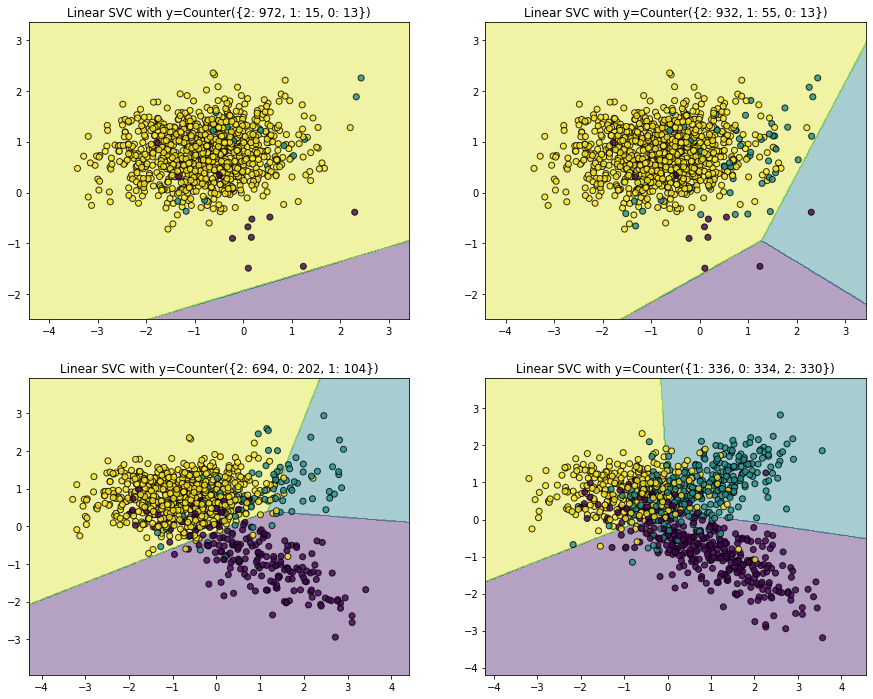

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(n_samples=1000, weights=weights)
    clf = LinearSVC().fit(X, y)
    plot_decision_function(X, y, clf, ax)
    ax.set_title('Linear SVC with y={}'.format(Counter(y)))

In [0]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
FraudT.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [21]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

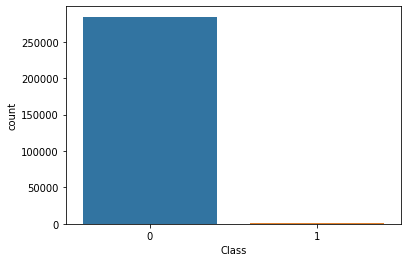

In [22]:
sns.countplot(data['Class'])

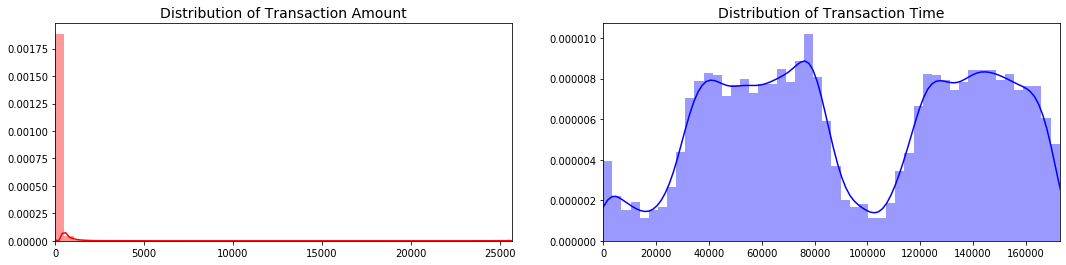

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

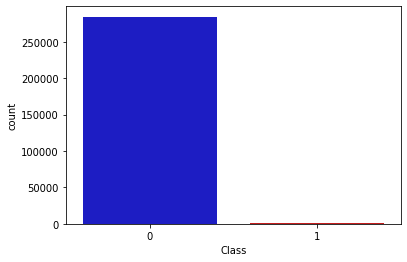

In [24]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data['Class'], palette=colors)

In [25]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [26]:
data['Amount'].values.reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [27]:
data['Amount'].values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [0]:
from sklearn.preprocessing import RobustScaler
RobustScaler=RobustScaler()
#Robustscaler less prone to Outliers
data['scaled_amount'] = RobustScaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = RobustScaler.fit_transform(data['Time'].values.reshape(-1,1))

In [0]:
data.drop(['Amount'],axis=1,inplace=True)
data.drop(['Time'],axis=1,inplace=True)

In [0]:
X_new=data.loc[:, data.columns != 'Class'].values
y_new=data['Class'].values

In [31]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=4)
skf.get_n_splits(X_new,y_new)

for train_index,test_index in skf.split(X_new,y_new):
  print("X Train:",train_index,"\n","Test:",test_index,"\n")
  X_train,X_test =X_new[train_index],X_new[test_index]
  y_train,y_test = y_new[train_index],y_new[test_index]

X Train: [ 42784  42856  42887 ... 284804 284805 284806] 
 Test: [    0     1     2 ... 71253 71254 71255] 

X Train: [     0      1      2 ... 284804 284805 284806] 
 Test: [ 42784  42856  42887 ... 142425 142426 142427] 

X Train: [     0      1      2 ... 284804 284805 284806] 
 Test: [119781 120505 120837 ... 213632 213633 213634] 

X Train: [     0      1      2 ... 213632 213633 213634] 
 Test: [189701 189878 190368 ... 284804 284805 284806] 



In [32]:
print(sum(y_train==1))
print(sum(y_train==0))

369
213237


In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print(sum(y_train_res==1))
print(sum(y_train_res==0))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


213237
213237


In [34]:
y_train.ravel().shape

(213606,)

In [35]:
X_train_res.shape

(426474, 30)

In [36]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827252 0.00172748]
[0.9982725 0.0017275]


In [37]:
pd.Series(y_train).value_counts()

0    213237
1       369
dtype: int64

In [0]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [0]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [40]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='saga',verbose=1)
logreg.fit(X_train_res,y_train_res)

y_pred=logreg.predict(X_test)
print("LogisticRegression Accuracy: ", accuracy_score(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 36 seconds
LogisticRegression Accuracy:  0.9915310178227834


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.8s finished


[[70492   586]
 [   17   106]]
**************************************************
Precision =     0.153
Recall    =     0.862
F1_score  =     0.260


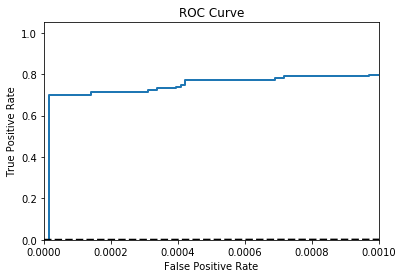

In [41]:
from sklearn.metrics import confusion_matrix,roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("*"*50)

y_score = logreg.decision_function(X_test)
fpr, tpr, t = roc_curve(y_test, y_score)
show_metrics()
plot_roc()

Gaussian NaiveBayes Accuracy: 0.978019971629612
[[69539  1539]
 [   26    97]]
Precision =     0.059
Recall    =     0.789
F1_score  =     0.110


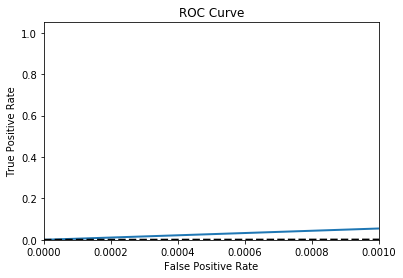

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train_res, y_train_res) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
print("Gaussian NaiveBayes Accuracy:",accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix,roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_score = gnb.predict_proba(X_test)[:,1]
fpr, tpr, t = roc_curve(y_test, y_score)
show_metrics()
plot_roc()

KNN Accuracy:  0.9988483307818711
[[71021    57]
 [   25    98]]
Precision =     0.632
Recall    =     0.797
F1_score  =     0.705


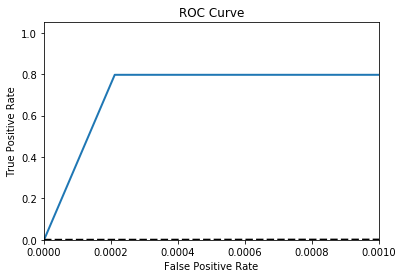

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='auto',n_neighbors=5)
knn.fit(X_train_res,y_train_res)

y_pred = knn.predict(X_test)
print("KNN Accuracy: ",accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix,roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_score = knn.predict_proba(X_test)[:,1]
fpr, tpr, t = roc_curve(y_test, y_score)
show_metrics()
plot_roc()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71078
           1       0.72      0.60      0.65       123

    accuracy                           1.00     71201
   macro avg       0.86      0.80      0.83     71201
weighted avg       1.00      1.00      1.00     71201


 Accuracy Score is: 0.9989045097681213
[[71049    29]
 [   49    74]]
Precision =     0.718
Recall    =     0.602
F1_score  =     0.655


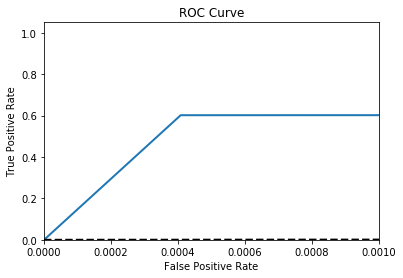

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("\n Accuracy Score is:",accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix,roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_score = dt_clf.predict_proba(X_test)[:,1]
fpr, tpr, t = roc_curve(y_test, y_score)
show_metrics()
plot_roc()

In [0]:
Data=data.sample(frac=0.1,random_state=1)
print(Data.shape)
print(Data.describe())

(28481, 31)
                Time            V1  ...        Amount         Class
count   28481.000000  28481.000000  ...  28481.000000  28481.000000
mean    94705.035216     -0.001143  ...     89.957884      0.001720
std     47584.727034      1.994661  ...    270.894630      0.041443
min         0.000000    -40.470142  ...      0.000000      0.000000
25%     53924.000000     -0.908809  ...      5.980000      0.000000
50%     84551.000000      0.031139  ...     22.350000      0.000000
75%    139392.000000      1.320048  ...     78.930000      0.000000
max    172784.000000      2.411499  ...  19656.530000      1.000000

[8 rows x 31 columns]


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params={'n_estimators':[10,20,50,100],'criterion':['gini','entropy'],'max_depth':[None,5,10,25,50]}
rf=RandomForestClassifier(random_state=0)
clf=GridSearchCV(rf,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)
clf.fit(X_train_res,y_train_res)
print('Best Score:{}'.format(clf.best_score_))
print('Best parameters:{}'.format(clf.best_params_))

Best Score:0.9993106277111281
Best parameters:{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 10}


Random Forest Accuracy: 0.9993960758978104
[[71075     3]
 [   40    83]]
Precision =     0.965
Recall    =     0.675
F1_score  =     0.794


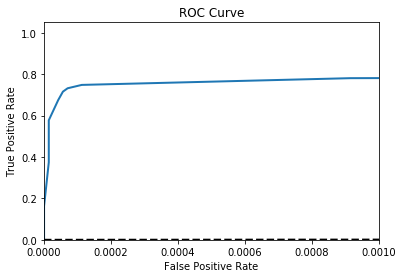

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_best = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=None,random_state=0)
rf_best.fit(X_train_res,y_train_res)
y_pred=rf_best.predict(X_test)
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix,roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_score = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, t = roc_curve(y_test, y_score)
show_metrics()
plot_roc()

In [0]:
from sklearn.svm import SVC
params = {'kernel':['linear','rbf','sigmoid'],'C':[1,3,5,10],'degree':[3,5,10]}
svc = SVC(probability=True,random_state=0)
clf = GridSearchCV(svc,param_grid=params,scoring='accuracy',cv=5,n_jobs =-1)
clf.fit(X_train_res,y_train_res)
print('Best Score:{}'.format(clf.best_score_))
print('Best parameter:{}'.format(clf.best_params_))


In [0]:
from sklearn.svm import SVC
svc_best =SVC(C=1,degree=3,kernel ='linear',probability=True,random_state=0)
svc_best.fit(X_train_res,y_train_res)
y_pred=svc_best.predict(X_test)
print("SVM Accuracy:",accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix,roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)i

y_score = svc_best.predict_proba(X_test)[:,1]
fpr, tpr, t = roc_curve(y_test, y_score)
show_metrics()
plot_roc()

[[6879  229]
 [   2   10]]


Text(0.5, 257.44, 'Predicted label')

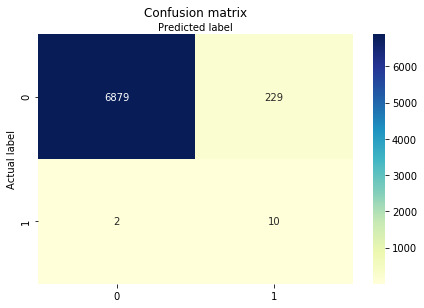

In [0]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')